# Análisis correlación: Better Life Index vs GDP per capita

## Librerías
Importamos las librerías necesarias.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carga y preparación de datos
Cargamos los datos y creamos los datasets.

In [ ]:
pib = pd.read_csv("gdp_per_capita.csv")
vida = pd.read_csv("life_satisfaction.csv")

Y hacemos una exploración inicial.

In [ ]:
pib.info()
pib.head()

vida.info()
vida.head()

Limpiamos nombres de columnas

In [ ]:
pib.columns = pib.columns.str.strip()
vida.columns = vida.columns.str.strip()

Renombramos columnas clave

In [ ]:
pib = pib.rename(columns={
    "Entity": "Country",
    "GDP per capita, PPP (constant 2021 international $)": "GDP_per_capita"
})

vida = vida.rename(columns={
    "Country": "Country",
    "Life satisfaction": "Life_satisfaction"
})

Filtramos el PIB para relacionarlo con los datos de Índice para una Vida Mejor

In [ ]:
ultimo_anio = pib["Year"].max()
pib_reciente = pib[pib["Year"] == ultimo_anio][["Country", "GDP_per_capita"]]

Seleccionamos columnas relevantes del índice

In [ ]:
vida_simple = vida[["Country", "Life_satisfaction"]]

Unimos ambos datasets.

In [ ]:
df = pd.merge(pib_reciente, vida_simple, on="Country", how="inner")

print(df.head())
print(f"\nFilas combinadas: {len(df)}")

## Visualización de los datos


Correlación PIB vs Satisfacción con la vida: 0.665


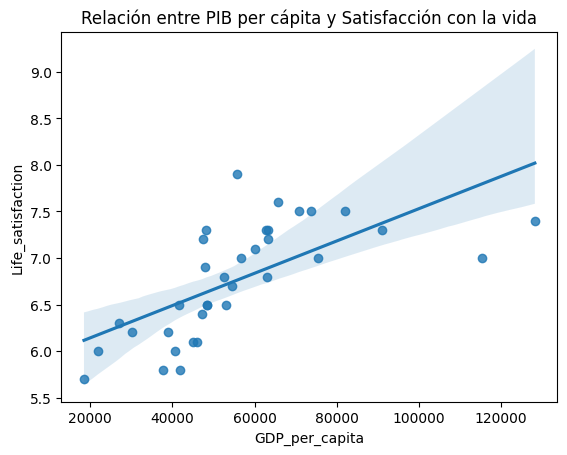

In [ ]:
corr = df["GDP_per_capita"].corr(df["Life_satisfaction"])
print(f"\nCorrelación PIB vs Satisfacción con la vida: {corr:.3f}")

sns.regplot(x="GDP_per_capita", y="Life_satisfaction", data=df)
plt.title("Relación entre PIB per cápita y Satisfacción con la vida")
plt.show()